# 7.2 进行数据预处理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image, y_train_label), \
(x_test_image, y_test_label) = mnist.load_data()

In [3]:
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [19]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 7.3 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()  # 建立Sequential模型

In [10]:
model.add(Dense(units = 256, input_dim = 784, kernel_initializer='normal', activation='relu'))

In [11]:
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [12]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 7.4 进行训练

In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
train_history = model.fit(x=x_Train_normalize, y = y_Train_OneHot, validation_split = 0.2, 
                          epochs = 10, batch_size = 200, verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.4385 - acc: 0.8829 - val_loss: 0.2180 - val_acc: 0.9409
Epoch 2/10
 - 1s - loss: 0.1908 - acc: 0.9455 - val_loss: 0.1559 - val_acc: 0.9554
Epoch 3/10
 - 1s - loss: 0.1355 - acc: 0.9616 - val_loss: 0.1259 - val_acc: 0.9648
Epoch 4/10
 - 1s - loss: 0.1028 - acc: 0.9703 - val_loss: 0.1123 - val_acc: 0.9681
Epoch 5/10
 - 1s - loss: 0.0812 - acc: 0.9773 - val_loss: 0.0978 - val_acc: 0.9718
Epoch 6/10
 - 1s - loss: 0.0660 - acc: 0.9818 - val_loss: 0.0936 - val_acc: 0.9723
Epoch 7/10
 - 1s - loss: 0.0544 - acc: 0.9850 - val_loss: 0.0912 - val_acc: 0.9737
Epoch 8/10
 - 1s - loss: 0.0460 - acc: 0.9874 - val_loss: 0.0831 - val_acc: 0.9759
Epoch 9/10
 - 1s - loss: 0.0379 - acc: 0.9903 - val_loss: 0.0817 - val_acc: 0.9768
Epoch 10/10
 - 1s - loss: 0.0315 - acc: 0.9918 - val_loss: 0.0809 - val_acc: 0.9763


In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show

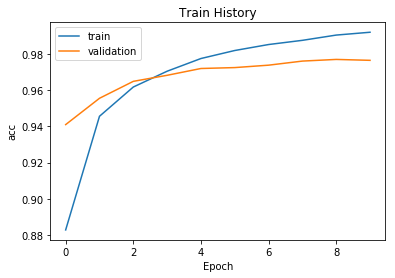

In [16]:
show_train_history(train_history, 'acc', 'val_acc')

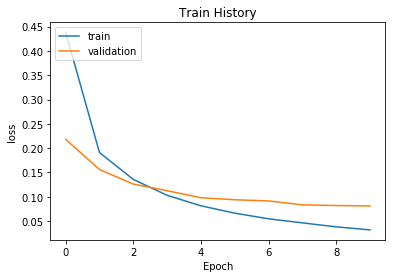

In [17]:
show_train_history(train_history, 'loss', 'val_loss')

# 7.5 以测试数据评估模型准确率

In [20]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 0s 18us/step

accuracy= 0.9764


# 7.6 进行预测

In [22]:
prediction = model.predict_classes(x_Test)

In [23]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [37]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: 
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title='label=' + str(labels[idx])
        if len(prediction) > 0:
            title += ', predict = ' + str(prediction[idx])
            
        ax.set_title(title, fontsize = 12, color = 'white')
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

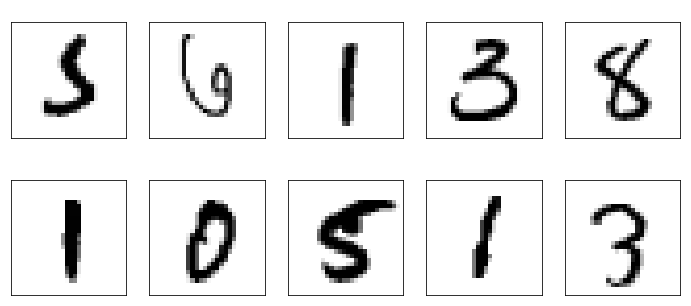

In [38]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=340)

# 7.7 显示混淆矩阵

In [39]:
import pandas as pd
pd.crosstab(y_test_label, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1013,1,0,0,2,3,8,0
3,0,0,4,994,0,0,0,3,5,4
4,1,0,5,1,962,0,3,0,3,7
5,3,0,0,15,1,854,7,1,8,3
6,5,3,2,1,3,3,939,0,2,0
7,0,5,12,6,1,0,0,990,6,8
8,4,0,3,6,2,1,1,2,954,1


In [40]:
df = pd.DataFrame({'label': y_test_label, 'predict' : prediction})

In [41]:
df[:2]

,label,predict
0,7,7
1,2,2


In [43]:
df[(df.label == 5) & (df.predict == 3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
4271,5,3
4355,5,3


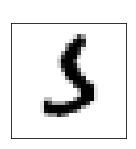

In [44]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx = 340, num = 1)

# 7.8 隐藏层增加为1000个神经单元

In [45]:
model = Sequential()

In [46]:
model.add(Dense(units=1000, input_dim = 784, kernel_initializer='normal', activation='relu'))

In [47]:
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [49]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [51]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
train_history = model.fit(x=x_Train_normalize, y=y_Train_OneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 5s - loss: 0.2944 - acc: 0.9151 - val_loss: 0.1539 - val_acc: 0.9568
Epoch 2/10
 - 5s - loss: 0.1154 - acc: 0.9674 - val_loss: 0.1216 - val_acc: 0.9637
Epoch 3/10
 - 5s - loss: 0.0740 - acc: 0.9793 - val_loss: 0.0916 - val_acc: 0.9733
Epoch 4/10
 - 5s - loss: 0.0523 - acc: 0.9853 - val_loss: 0.0812 - val_acc: 0.9751
Epoch 5/10
 - 5s - loss: 0.0360 - acc: 0.9903 - val_loss: 0.0827 - val_acc: 0.9753
Epoch 6/10
 - 5s - loss: 0.0248 - acc: 0.9937 - val_loss: 0.0727 - val_acc: 0.9784
Epoch 7/10
 - 5s - loss: 0.0184 - acc: 0.9955 - val_loss: 0.0717 - val_acc: 0.9783
Epoch 8/10
 - 5s - loss: 0.0137 - acc: 0.9968 - val_loss: 0.0732 - val_acc: 0.9784
Epoch 9/10
 - 5s - loss: 0.0101 - acc: 0.9980 - val_loss: 0.0710 - val_acc: 0.9795
Epoch 10/10
 - 5s - loss: 0.0071 - acc: 0.9990 - val_loss: 0.0783 - val_acc: 0.9775


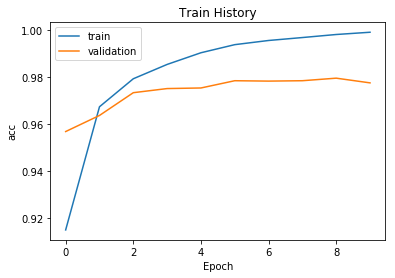

In [53]:
show_train_history(train_history, 'acc', 'val_acc')

In [58]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 1s 71us/step

accuracy= 0.979


# 7.9 多层感知器加入DropOut功能以避免过度拟合

In [69]:
from keras.layers import Dropout
model = Sequential()
model.add(Dense(units=1000, input_dim = 784, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [70]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [71]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
train_history = model.fit(x=x_Train_normalize, y=y_Train_OneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 5s - loss: 0.3584 - acc: 0.8928 - val_loss: 0.1607 - val_acc: 0.9553
Epoch 2/10
 - 5s - loss: 0.1584 - acc: 0.9537 - val_loss: 0.1153 - val_acc: 0.9647
Epoch 3/10
 - 5s - loss: 0.1156 - acc: 0.9665 - val_loss: 0.0955 - val_acc: 0.9716
Epoch 4/10
 - 5s - loss: 0.0911 - acc: 0.9728 - val_loss: 0.0828 - val_acc: 0.9747
Epoch 5/10
 - 5s - loss: 0.0753 - acc: 0.9773 - val_loss: 0.0790 - val_acc: 0.9759
Epoch 6/10
 - 5s - loss: 0.0641 - acc: 0.9802 - val_loss: 0.0779 - val_acc: 0.9769
Epoch 7/10
 - 5s - loss: 0.0534 - acc: 0.9839 - val_loss: 0.0761 - val_acc: 0.9774
Epoch 8/10
 - 5s - loss: 0.0458 - acc: 0.9857 - val_loss: 0.0698 - val_acc: 0.9785
Epoch 9/10
 - 5s - loss: 0.0409 - acc: 0.9874 - val_loss: 0.0684 - val_acc: 0.9798
Epoch 10/10
 - 5s - loss: 0.0376 - acc: 0.9877 - val_loss: 0.0681 - val_acc: 0.9801


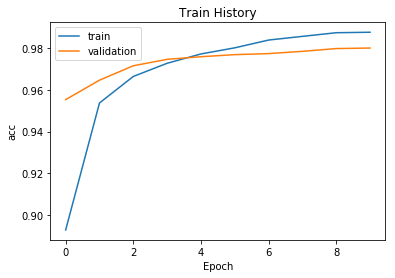

In [73]:
show_train_history(train_history, 'acc', 'val_acc')

In [74]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 1s 62us/step

accuracy= 0.9817


# 7.10 建立多层感知器模型包含两个隐藏层

In [75]:
model = Sequential()
model.add(Dense(units=1000, input_dim = 784, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000, input_dim = 784, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [76]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [77]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_Train_normalize, y=y_Train_OneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 13s - loss: 0.3729 - acc: 0.8831 - val_loss: 0.1337 - val_acc: 0.9597
Epoch 2/10
 - 12s - loss: 0.1631 - acc: 0.9503 - val_loss: 0.1105 - val_acc: 0.9664
Epoch 3/10
 - 12s - loss: 0.1236 - acc: 0.9616 - val_loss: 0.0905 - val_acc: 0.9731
Epoch 4/10
 - 12s - loss: 0.0984 - acc: 0.9695 - val_loss: 0.0818 - val_acc: 0.9736
Epoch 5/10
 - 12s - loss: 0.0842 - acc: 0.9739 - val_loss: 0.0744 - val_acc: 0.9764
Epoch 6/10
 - 12s - loss: 0.0760 - acc: 0.9761 - val_loss: 0.0768 - val_acc: 0.9763
Epoch 7/10
 - 12s - loss: 0.0658 - acc: 0.9792 - val_loss: 0.0749 - val_acc: 0.9784
Epoch 8/10
 - 12s - loss: 0.0613 - acc: 0.9800 - val_loss: 0.0777 - val_acc: 0.9776
Epoch 9/10
 - 12s - loss: 0.0550 - acc: 0.9823 - val_loss: 0.0777 - val_acc: 0.9782
Epoch 10/10
 - 12s - loss: 0.0521 - acc: 0.9829 - val_loss: 0.0694 - val_acc: 0.9803


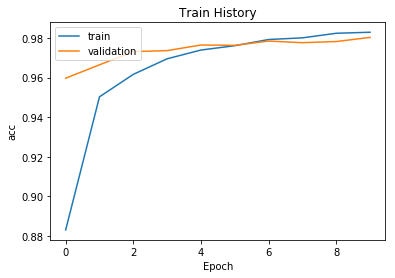

In [78]:
show_train_history(train_history, 'acc', 'val_acc')

In [79]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 1s 107us/step

accuracy= 0.9812
